# Analysis of the "Does Business With" Network

After having [reduced our network in the previous instance](businessNetworkStudy.ipynb), I can now answer some of the questions I have for our dataset.

In [1]:
#imports

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cPickle as cpkl #for serialization
from IPython.display import display, HTML

#constants

%matplotlib inline
sns.set_style("dark")
sigLev = 3
figWidth = figHeight = 5

#useful functions

def getEdgeInfo(edgeVec,keyName):
    #helper for returning a list of edge information over the whole list of
    #edges
    edgeInfoDict = {"edgeID":[],keyName:[]}
    for edgeTup in edgeVec:
        #0th entry is ID
        edgeInfoDict["edgeID"].append(edgeTup[0])
        #then get key info
        givenEdgeDict = edgeTup[2]
        edgeInfoDict[keyName].append(givenEdgeDict[keyName])
    return edgeInfoDict

def getNodeInfo(nodeVec,keyName):
    #helper for returning a list of node information over the whole list of
    #nodes
    nodeInfoDict = {"nodeID":[],keyName:[]}
    for nodeTup in nodeVec:
        #0th entry is ID
        nodeInfoDict["nodeID"].append(nodeTup[0])
        #then get key info
        givenNodeDict = nodeTup[1]
        nodeInfoDict[keyName].append(givenNodeDict[keyName])
    return nodeInfoDict

def makeDensity(givenFrame,givenCountVar):
    #helper that makes density in the given frame
    givenFrame["density"] = (givenFrame[givenCountVar] / 
                                sum(givenFrame[givenCountVar]))
    return givenFrame

def sortAndRank(givenFrame,givenSortVar,withLog = True):
    #helper that sorts and ranks a given dataframe over a sorting variable
    givenFrame = givenFrame.sort_values(givenSortVar,ascending = False)
    givenFrame["rank"] = range(givenFrame.shape[0])
    if (withLog): #add log rang
        givenFrame["logRank"] = np.log(givenFrame["rank"] + 1)
    return givenFrame

In [2]:
#load in dataset
mainNetwork = nx.read_gpickle("../data/processed/doesBusinessWith.pkl")

We will start by reiterating several of the summary statistics that we were interested in for the initial network.

## Summary Statistics

In [5]:
#get number of nodes and number of edges in this network
numNodes = len(mainNetwork.nodes())
numEdges = len(mainNetwork.edges())

We see that there are {{numNodes}} nodes and {{numEdges}} edges in this network. This may have an important effect on some of the density measures in this network.

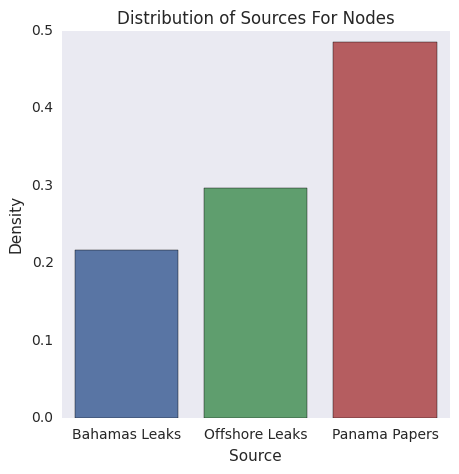

In [7]:
nodeVec = mainNetwork.nodes(data = True)
edgeVec = mainNetwork.edges(data = True)
#get node source types
nodeSourceFrame = pd.DataFrame(getNodeInfo(nodeVec,"sourceID"))
#get counts
nodeSourceCountFrame = nodeSourceFrame.groupby("sourceID",as_index = False)[
                                                "nodeID"].count()
#rename some aspects
nodeSourceCountFrame = nodeSourceCountFrame.rename(columns = {"nodeID":"count"})
nodeSourceCountFrame = makeDensity(nodeSourceCountFrame,"count")
#then plot
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.barplot(x = "sourceID",y = "density",data = nodeSourceCountFrame)
plt.xlabel("Source")
plt.ylabel("Density")
plt.title("Distribution of Sources For Nodes")

_Figure 1: Distribution of Sources for Nodes._

We see that the hierarchy of node sources is about the same as it was last time (see [Initial Notebook](initialAnalysis.ipynb), Figure 4), although the Offshore Leaks represents a slightly larger part of the distribution than last time and the Panama Papers represent a slightly smaller part of the distribution than last time.

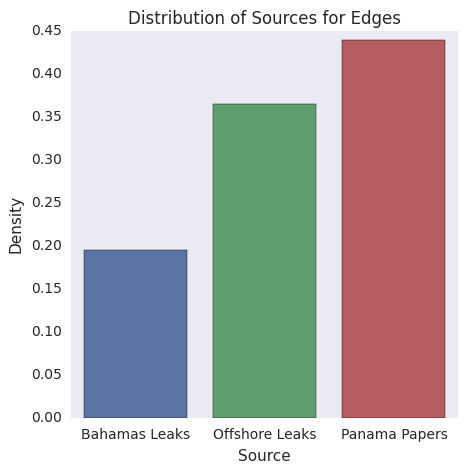

In [8]:
edgeSourceFrame = pd.DataFrame(getEdgeInfo(edgeVec,"sourceID"))
#get counts
edgeSourceCountFrame = edgeSourceFrame.groupby("sourceID",as_index = False)[
                                                "edgeID"].count()
#rename some aspects
edgeSourceCountFrame = edgeSourceCountFrame.rename(columns = {"edgeID":"count"})
edgeSourceCountFrame = makeDensity(edgeSourceCountFrame,"count")
#then plot
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.barplot(x = "sourceID",y = "density",data = edgeSourceCountFrame)
plt.xlabel("Source")
plt.ylabel("Density")
plt.title("Distribution of Sources for Edges")

_Figure 2: Distribution of Sources for our edges._

Interestingly, once we removed many of our disambiguation edges, we see that the Bahamas Leaks represents a less significant part of our network than before (see [initial analysis](initialAnalysis.ipynb), Figure 5). Given that the relationship between the Offshore Leaks and the Panama Papers in this distribution looks relatively similar to before, there is strong evidence for this situation.

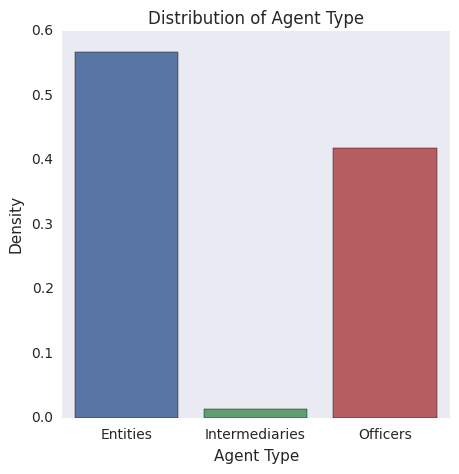

In [9]:
#get distribution of node types
agentTypeFrame = pd.DataFrame(getNodeInfo(nodeVec,"entType"))
#get counts
agentTypeCountFrame = agentTypeFrame.groupby("entType",as_index = False)[
                                "nodeID"].count()
agentTypeCountFrame = makeDensity(agentTypeCountFrame,"nodeID")
#then plot
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.barplot(x = "entType",y = "density",data = agentTypeCountFrame)
plt.xlabel("Agent Type")
plt.ylabel("Density")
plt.title("Distribution of Agent Type")

_Figure 3: Distribution of Agent Types in our Network._

We see that this distribution looks very similar to the one done early in the process in our reduction procedure (see [Reduction Notebook](businessNetworkStudy.ipynb), Figure 1).

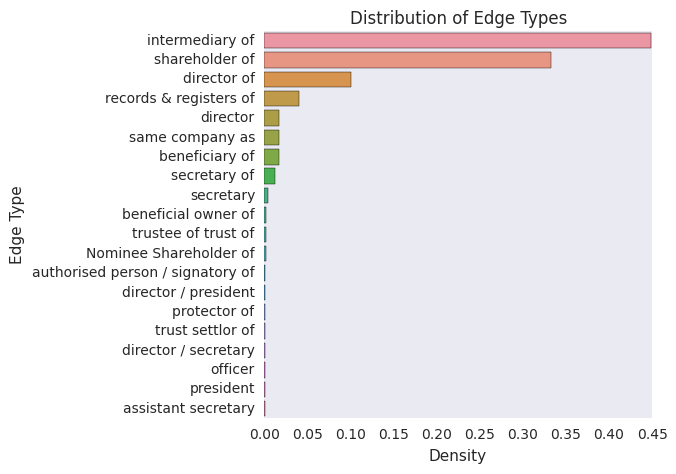

In [9]:
#get distribution of edge types
edgeTypeFrame = pd.DataFrame(getEdgeInfo(edgeVec,"reltype"))
edgeTypeCountFrame = edgeTypeFrame.groupby("reltype",as_index = False)[
                        "edgeID"].count()
edgeTypeCountFrame = makeDensity(edgeTypeCountFrame,"edgeID")
#sort and rank
edgeTypeCountFrame = sortAndRank(edgeTypeCountFrame,"density")
#then plot
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.barplot(y = "reltype",x = "density",data = edgeTypeCountFrame,orient = "h")
plt.xlabel("Density")
plt.ylabel("Edge Type")
plt.title("Distribution of Edge Types")

_Figure 4: Distribution of Edge Types in our network._

This looks pretty similar to the distribution we found in the midst of our reduction study (see [Reduction Study](businessNetworkStudy.ipynb), Figure 3). That being said, this distribution is not nearly as meaningful for our analysis now, since we have simplified all of these into a "Does business with" undirected edge type.

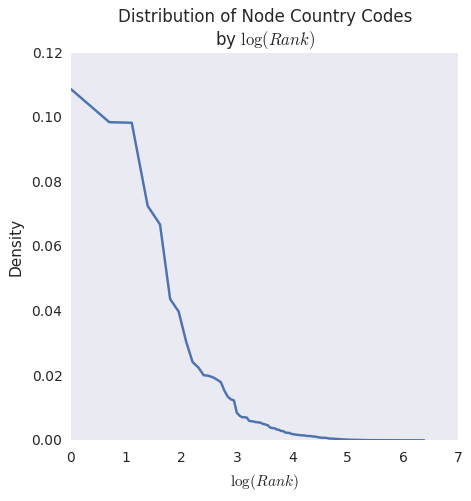

In [10]:
#get country information
countryFrame = pd.DataFrame(getNodeInfo(nodeVec,"countrycodes"))
countryCountFrame = countryFrame.groupby("countrycodes",as_index = False)[
                        "nodeID"].count()
countryCountFrame = makeDensity(countryCountFrame,"nodeID")
#order by density
countryCountFrame = sortAndRank(countryCountFrame,"density")
#then plot by rank
plt.figure(figsize = (figWidth,figHeight))
plt.plot(countryCountFrame["logRank"],countryCountFrame["density"])
plt.xlabel("$\log(Rank)$")
plt.ylabel("Density")
plt.title("Distribution of Node Country Codes\nby $\log(Rank)$")

_Figure 5: Distribution of Country Code of Node by $\log(Rank).$_

It is apparent that we see a similar density behavior to last time, as the distribution dissipates after the top $e^5 \approx 55$ country codes. Let us see what the top 10 country codes are.

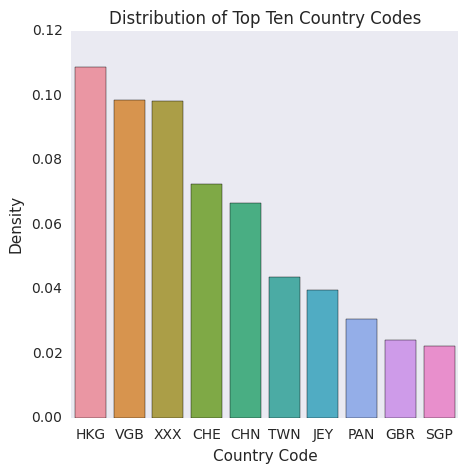

In [11]:
#get top ten country codes
topLev = 10
topTenCountryCodes = countryCountFrame.iloc[0:topLev,:]
#then plot
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.barplot(x = "countrycodes",y = "density",data = topTenCountryCodes)
plt.xlabel("Country Code")
plt.ylabel("Density")
plt.title("Distribution of Top Ten Country Codes")

_Figure 6: Distribution of our top $10$ country codes for our nodes._

This looks very similar to the top ten country codes of our previous analysis (see [Initial Analysis](initialAnalysis.ipynb), Figure 3), although some of the order has been switched up an Singapore (SGP) is suddenly more meaningful for this network.

## Network Measures

In [34]:
degreeDict = nx.degree_centrality(mainNetwork)
degreeFrame = pd.DataFrame({"nodeID":degreeDict.keys(),
                            "degree":degreeDict.values()})
#recalculate degree
degreeFrame["degree"] = degreeFrame["degree"] * degreeFrame.shape[0]
degreeFrame["logDegree"] = np.log(degreeFrame["degree"] + 1)

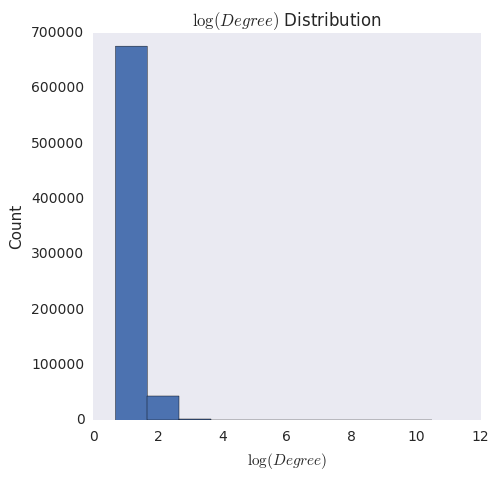

In [36]:
givenFig = plt.figure(figsize = (figWidth,figHeight))
plt.hist(degreeFrame["logDegree"])
plt.xlabel("$\log(Degree)$")
plt.ylabel("Count")
plt.title("$\log(Degree)$ Distribution")

_Figure 7: $\log(Degree)$ distribution._

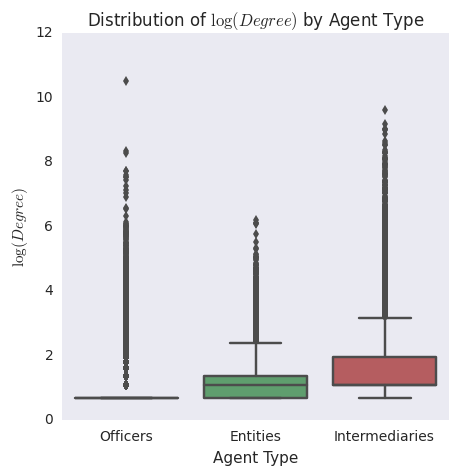

In [37]:
#get agent types
degreeFrame = degreeFrame.merge(agentTypeFrame,on = "nodeID")
#then plot
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.boxplot(x = "entType",y = "logDegree",data = degreeFrame)
plt.xlabel("Agent Type")
plt.ylabel("$\log(Degree)$")
plt.title("Distribution of $\log(Degree)$ by Agent Type")

_Figure 8: Degree Distribution by Agent Type._

In [3]:
betweennessCentralityDict = cpkl.load(open("../data/processed/newBCDict.pkl",
                                           "rb"))

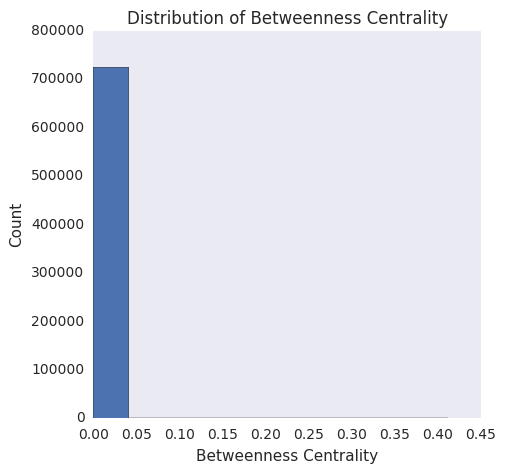

In [4]:
#plot betweenness centrality
givenFig = plt.figure(figsize = (figWidth,figHeight))
plt.hist(betweennessCentralityDict.values())
plt.xlabel("Betweenness Centrality")
plt.ylabel("Count")
plt.title("Distribution of Betweenness Centrality")

_Figure 9: Distribution of Betweenness Centrality on This Network._

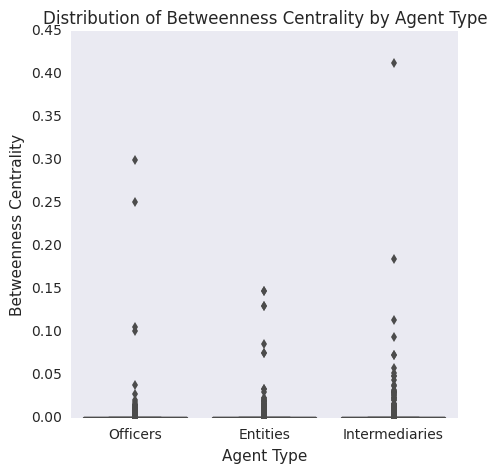

In [10]:
#make betweenness centrality frame
bcFrame = pd.DataFrame({"nodeID" : betweennessCentralityDict.keys(),
                        "bc" : betweennessCentralityDict.values()})
#get agent information
bcFrame = bcFrame.merge(agentTypeFrame,on = "nodeID")
#then plot by agent type
givenFig = plt.figure(figsize = (figWidth,figHeight))
sns.boxplot(x = "entType",y = "bc",data = bcFrame)
plt.xlabel("Agent Type")
plt.ylabel("Betweenness Centrality")
plt.title("Distribution of Betweenness Centrality by Agent Type")

_Figure 10: Distribution of Betweenness Centrality by Agent Type._

Unfortunately, it looks like there is little going on in terms of the distribution of betweenness centrality and its relationship with agent types. Generally, there are only a few agents that have a meaningful amount of betweenness centrality on this network.

In [ ]:
#get some measures of distance
eccDict = nx.eccentricity(mainNetwork)

In [ ]:
#try out more measures of distance
closenessCentralDict = nx.closeness_centrality(mainNetwork)